In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load DataFrame
df = pd.read_csv("IT Salary Survey EU  2020.csv")
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [4]:
# check all columns
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

## Explore the data

### Age

In [5]:
# remove NaN's from column 'Age'
df = df[~df["Age"].isnull()]
len(df)

1226

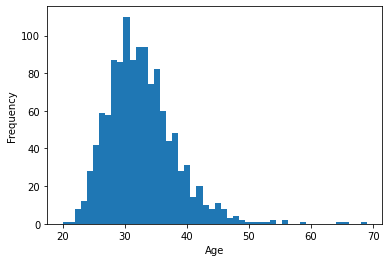

Text(0, 0.5, 'Years')

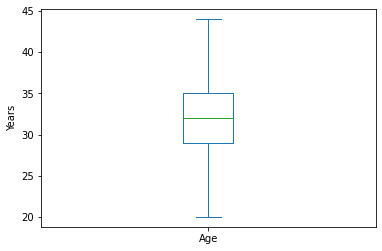

In [6]:
# plot Age distribution
df["Age"].plot.hist(bins=50)
plt.xlabel("Age")
plt.show()

# box plot
df["Age"].plot.box(showfliers=False)
plt.ylabel("Years")

### "Age" and "Total years of experience"

In [7]:
# remove NaN's from "Total years of experience"
df = df[~df["Total years of experience"].isnull()]
len(df)

1218

Text(0.5, 0, 'Total years of experience')

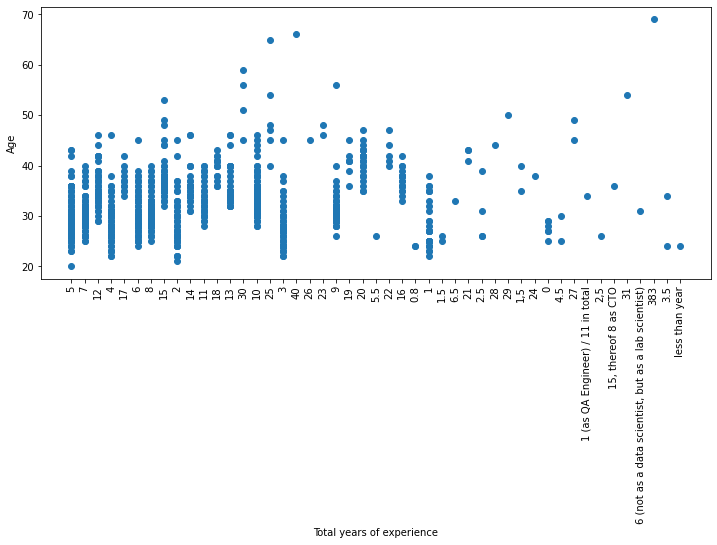

In [8]:
# plot 'Age' and 'Total years of experience'
plt.figure(figsize=(12, 5))
plt.scatter(df["Total years of experience"], df["Age"])
_ = plt.xticks(rotation=90)
plt.ylabel("Age"); plt.xlabel("Total years of experience")

In [9]:
# replace non-numeric values in column "Total years of experience" with NaN
df["Total years of experience"] = df["Total years of experience"].apply(pd.to_numeric, errors='coerce')

# remove NaN's from "Total years of experience" again
df = df[~df["Total years of experience"].isnull()]
len(df)

1211

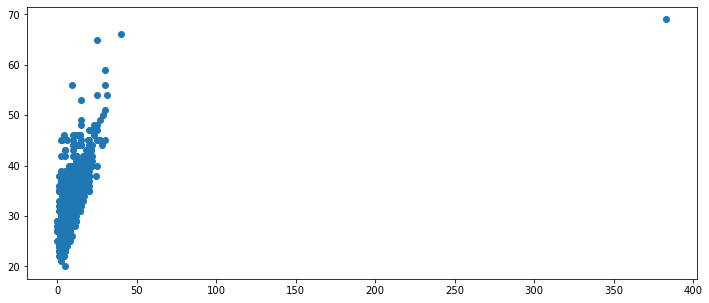

In [10]:
# plot it again
plt.figure(figsize=(12, 5))
plt.scatter(df["Total years of experience"], df["Age"])
#plt.xlim(0, 100)

#### Remove outlier

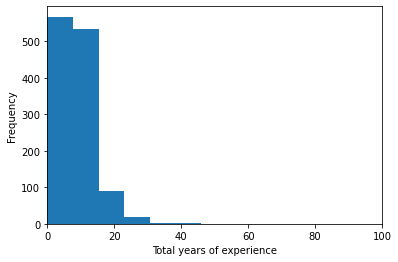

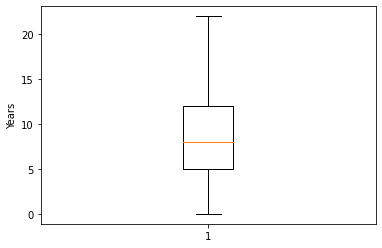

Text(0, 0.5, 'Years')

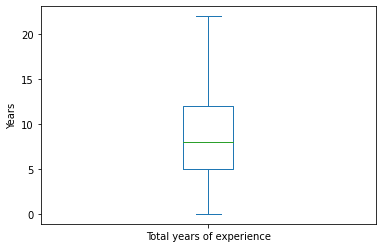

In [11]:
df["Total years of experience"].plot.hist(bins=50)
plt.xlabel("Total years of experience")
plt.xlim(0,100)
plt.show()
# --> positively skewed distribution

# box plot
boxplot_plt = plt.boxplot(df["Total years of experience"], showfliers=False)
plt.ylabel("Years")
plt.show()

boxplot_pd = df["Total years of experience"].plot.box(showfliers=False, return_type='dict')
plt.ylabel("Years")

In [12]:
# get whiskers values
[item.get_ydata() for item in boxplot_plt['whiskers']]

[array([5., 0.]), array([12., 22.])]

In [13]:
# return values from boxplot plotted with pandas
boxplot_pd

# change return from pandas boxplot --> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
[item.get_ydata() for item in boxplot_pd['whiskers']]

[array([5., 0.]), array([12., 22.])]

In [14]:
df['Total years of experience'].describe()

count    1211.000000
mean        9.066557
std        11.972355
min         0.000000
25%         5.000000
50%         8.000000
75%        12.000000
max       383.000000
Name: Total years of experience, dtype: float64

In [15]:
# Q3 + whis*(Q3-Q1)
upper_limit = 12 + 1.5 * (12 - 5)
upper_limit

22.5

In [16]:
# Q1 - whis*(Q3-Q1)
lower_limit = 5 - 1.5 * (12 - 5)
lower_limit

-5.5

In [17]:
# apply the limits to our DataFrame
df = df[(df["Total years of experience"] <= upper_limit) & (df["Total years of experience"] >= lower_limit)]

In [18]:
df['Total years of experience'].describe()

count    1190.000000
mean        8.444202
std         4.688790
min         0.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        22.000000
Name: Total years of experience, dtype: float64

Text(0.5, 0, 'Total years of experience')

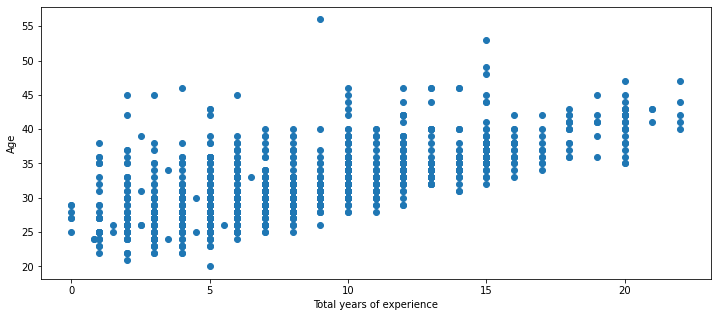

In [19]:
# plot it again without outliers
plt.figure(figsize=(12, 5))
plt.scatter(df["Total years of experience"], df["Age"])
plt.ylabel("Age"); plt.xlabel("Total years of experience")

### Correlations

In [20]:
from scipy.stats import pearsonr, spearmanr

Pearson's correlation coefficient
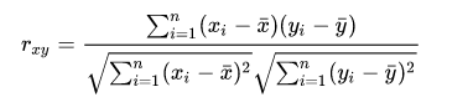

In [21]:
# todo: implement Peason's correlation coefficient
def pearson(x, y):
    x = x - np.mean(x)
    y = y - np.mean(y)
    return np.sum((x * y)) / (np.sqrt(np.sum(x ** 2)) * (np.sqrt(np.sum(y ** 2))))

In [22]:
pearson(df['Age'], df['Total years of experience'])

0.674670374714613

In [23]:
# pearson's correlation using scipy
corr, p_value = pearsonr(df['Age'], df['Total years of experience'])
corr

0.674670374714613

In [24]:
# spearman's correlation using scipy
corr, p_value = spearmanr(df['Age'], df['Total years of experience'])
corr

0.6767712298041489

### Gender

In [60]:
# reload DataFrame first since we don't need the DataFrame filtered by 
df = pd.read_csv("IT Salary Survey EU  2020.csv")
len(df)

1253

In [53]:
# throw away all NaN's
df = df[~df["Gender"].isnull()]

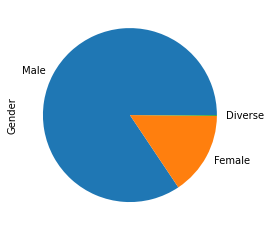

In [61]:
# plot gender
df["Gender"].value_counts().plot(kind='pie')
df["Gender"] = df["Gender"].astype(str)

In [62]:
# replace strings with numerical values
df.loc[df["Gender"] == "Male", "Gender"] = 0
df.loc[df["Gender"] == "Female", "Gender"] = 1
df.loc[df["Gender"] == "Diverse", "Gender"] = 2

<AxesSubplot:ylabel='Gender'>

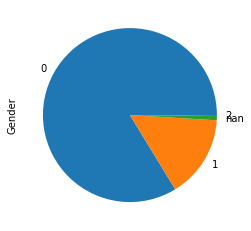

In [63]:
# plot
df["Gender"].value_counts().plot(kind='pie')

### Programming languages

In [30]:
# check values
keys = df["Your main technology / programming language"].value_counts()[0:5].keys()
keys

Index(['Java', 'Python', 'PHP', 'C++', 'JavaScript'], dtype='object')

<AxesSubplot:>

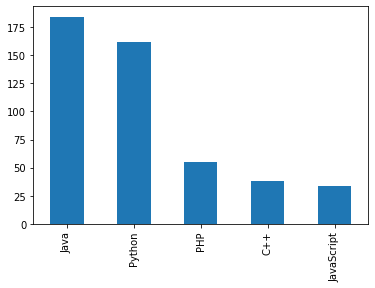

In [31]:
# plot programming languages
df["Your main technology / programming language"].value_counts()[0:5].plot(kind='bar')

In [32]:
# extract mask 
def get_mask(df_column, keys):
    mask = None
    for k in keys:
        if mask is None:
            mask = df_column.values == k
        else:
            mask = mask | (df_column.values == k)
    return mask
        
mask = get_mask(df["Your main technology / programming language"], keys)
df = df[mask]
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
8,24/11/2020 11:17:24,29.0,0,Berlin,Backend Developer,8,2,Senior,PHP,"SQL, AWS, Docker",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,30.0,NaN
9,24/11/2020 11:17:50,35.0,0,Berlin,Software Engineer,15,3,Lead,Java,NaN,...,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,NaN
11,24/11/2020 11:18:16,NaN,0,Berlin,Software Engineer,25,11,Senior,C++,"Python, C/C++, SQL",...,13000,24,Self-employed (freelancer),Temporary contract,English,11-50,Product,Yes,NaN,NaN
18,24/11/2020 11:20:03,27.0,0,Berlin,Backend Developer,8,3,Senior,PHP,NaN,...,NaN,25,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,NaN
23,24/11/2020 11:23:11,59.0,0,Berlin,Backend Developer,30,30,Senior,Java,"Kotlin, Java / Scala, SQL",...,2000,28,Full-time employee,Unlimited contract,German,101-1000,Product,No,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,17/01/2021 13:22:23,28.0,0,Berlin,Frontend Developer,5,5,Middle,JavaScript,Javascript / Typescript,...,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
1247,18/01/2021 11:50:02,34.0,0,Zurich,Software Engineer,7,2,Senior,PHP,PHP,...,NaN,25,Full-time employee,Unlimited contract,English,11-50,Startup,No,NaN,NaN
1248,18/01/2021 15:05:50,31.0,0,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1250,18/01/2021 23:20:35,39.0,0,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN


<AxesSubplot:ylabel='Your main technology / programming language'>

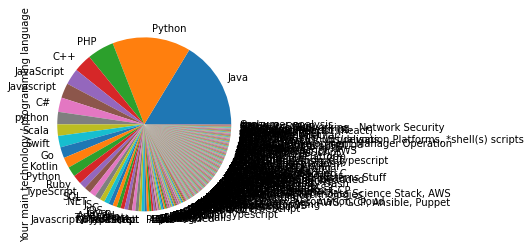

In [66]:
# plot again
df["Your main technology / programming language"].value_counts().plot(kind='pie')

In [65]:
# replace strings by numeric values
for idx, k in enumerate(keys):
    df.loc[df["Your main technology / programming language"] == k, 
           "Your main technology / programming language"] = idx

<AxesSubplot:ylabel='Your main technology / programming language'>

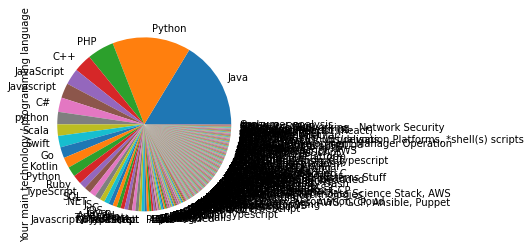

In [67]:
# plot
df["Your main technology / programming language"].value_counts().plot(kind='pie')

### Seniority level

In [36]:
df["Seniority level"].value_counts()

Senior                       199
Middle                       154
Lead                          59
Junior                        33
Head                          18
Manager                        1
No level                       1
Director                       1
C-level executive manager      1
Principal                      1
intern                         1
Working Student                1
Intern                         1
Name: Seniority level, dtype: int64

In [37]:
# get keys
keys = df["Seniority level"].value_counts()[:5].keys()
keys

# get mask
mask = get_mask(df["Seniority level"], keys)
df = df[mask]
df

for idx, k in enumerate(keys):
    df.loc[df["Seniority level"] == k, "Seniority level"] = idx

<AxesSubplot:ylabel='Seniority level'>

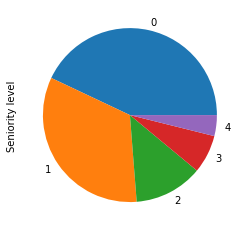

In [38]:
df["Seniority level"].value_counts().plot(kind='pie')

In [39]:
# we also need the Age again and we reset the index
df = df[~df["Age"].isnull()]
df = df.reset_index()

In [40]:
df["Yearly brutto salary (without bonus and stocks) in EUR"].unique()

array([ 56000.,  95000.,  60000.,  69000.,  70000.,  80000., 150000.,
        67000.,  74000.,  75000.,  77000.,  76000.,  65000.,  68000.,
        70500.,  55000.,  50000.,  61000.,  73000.,  81000.,  78000.,
        62000.,  72000.,  85000.,  79000., 120000.,  48000.,  54000.,
        90000.,  66000.,  63000.,  64000.,  61500.,  67200., 100000.,
        92500.,  58000.,  45000., 108000.,  42000.,  52000.,  57000.,
        92000.,  63500.,  89570.,  81200.,  20000.,  27000.,  10164.,
        83000.,  95500.,  50400.,  13000.,  74400.,  28800.,  44000.,
        46000.,  88000.,  18700.,  30000.,  66300.,  34000.,  47000.,
        82000.,  53000.,  63700.,  84000.,  76500., 130000.,  36000.,
       300000.,  40000.,  98000.,  93000., 102000.,  78600.,  54500.,
        82500.,  51000.,  86000.,  81900.,  71000.,  43000.,  22000.,
       105000.,  23000.,  29000., 110000.,  33000.,  49000.,  32000.,
        56700., 106000.,  49200.,  21000.,  85600.,  55200., 172000.,
       200000., 1150

## PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
# prepare features
features = [[row["Gender"], row["Your main technology / programming language"], row["Seniority level"], row["Yearly brutto salary (without bonus and stocks) in EUR"]] for idx, row in df.iterrows()]
features

X = np.asarray(features)

In [43]:
# perform PCA
pca = PCA(n_components=2)
features_new = pca.fit_transform(X)

Text(0, 0.5, 'PC 2')

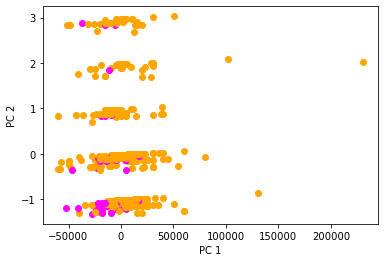

In [44]:
# plot the newly generated features
genders = ["Male", "Female", "Diverse"]
colors = ["orange", "magenta", "green"]

for idx, (x, feat) in enumerate(zip(X[..., 0], features_new)):
    plt.scatter(feat[..., 0], feat[..., 1], color=colors[int(x)])
    
plt.xlabel("PC 1"); plt.ylabel("PC 2")

Text(0, 0.5, 'PC 2')

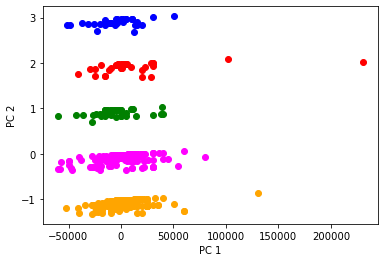

In [45]:
# plot programming languages
languages = ['Java', 'Python', 'PHP', 'C++', 'JavaScript']
colors = ["orange", "magenta", "green", "red", "blue"]

for idx, (x, feat) in enumerate(zip(X[..., 1], features_new)):
    plt.scatter(feat[..., 0], feat[..., 1], color=colors[int(x)])
    
plt.xlabel("PC 1"); plt.ylabel("PC 2")

## t-SNE

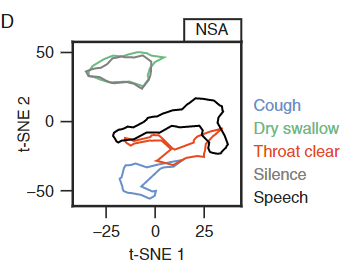

In [46]:
from sklearn.manifold import TSNE

In [47]:
# perform t-SNE
tsne = TSNE(n_components=2, perplexity=5, init='random')
embedding = tsne.fit_transform(X)

C:\Users\abhik\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0, 0.5, 't-SNE 2')

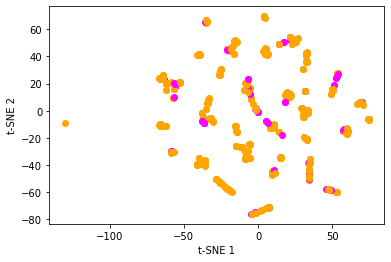

In [48]:
# plot embedding results
genders = ["Male", "Female", "Diverse"]
colors = ["orange", "magenta", "green"]

for idx, (x, emb) in enumerate(zip(X[..., 0], embedding)):
    plt.scatter(emb[..., 0], emb[..., 1], color=colors[int(x)])
    
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")

Text(0, 0.5, 't-SNE 2')

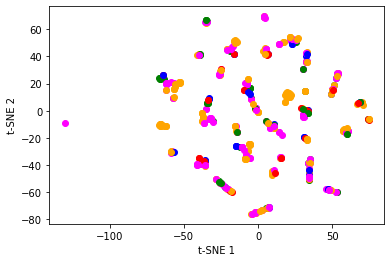

In [49]:
# plot progamming results
languages = ['Java', 'Python', 'PHP', 'C++', 'JavaScript']
colors = ["orange", "magenta", "green", "red", "blue"]

for idx, (x, emb) in enumerate(zip(X[..., 1], embedding)):
    plt.scatter(emb[..., 0], emb[..., 1], color=colors[int(x)])
    
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")

In [50]:
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
# create Pandas Profiler object
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
# generate Profiling report
profile.to_notebook_iframe()